<a href="https://colab.research.google.com/github/patty149/Formula-1/blob/main/Formula1DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

In [ ]:
circuits = pd.read_csv("circuits.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
driver_Standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
sptrint_results = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")

In [ ]:
merged_df = results.merge(status , on = 'statusId')
merged_df = merged_df.merge(races, on = 'raceId')
merged_df = merged_df.merge(drivers, on = 'driverId')
merged_df = merged_df.merge(constructors, on = 'constructorId')
merged_df = merged_df.merge(circuits , on = 'circuitId', suffixes=('_results', '_circuits'))


# **Drivers with most races in Formula 1**

In [ ]:
most_races = merged_df.groupby('surname')[['raceId']].count().reset_index()
most_races = most_races.sort_values('raceId', ascending= False).head(10)
most_races = most_races.rename(columns ={'raceId': 'total_races'})

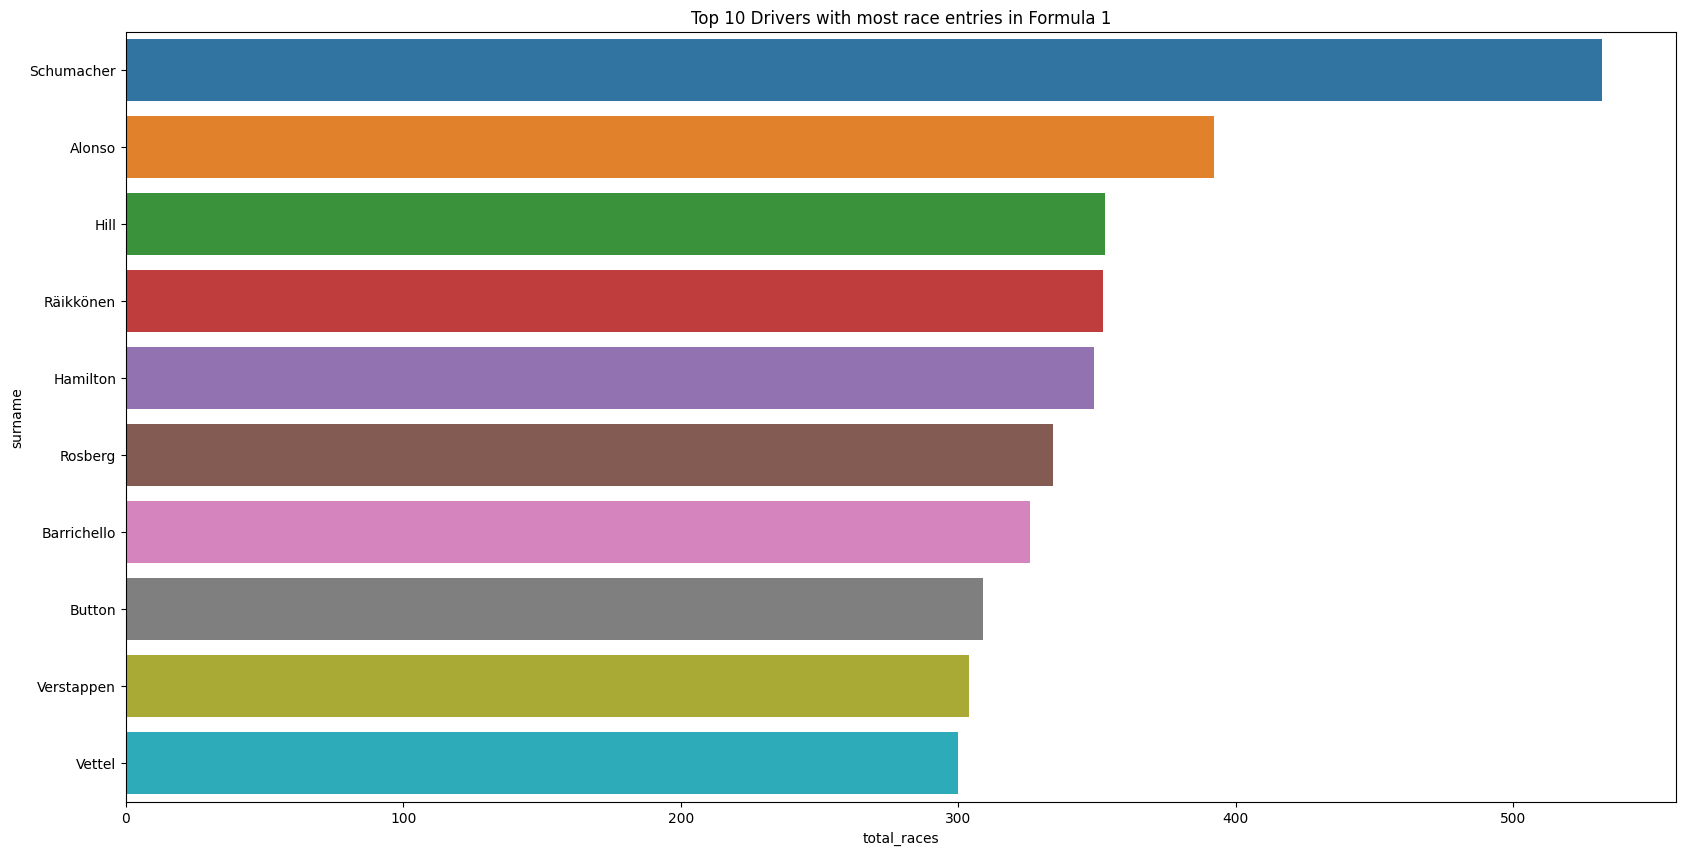

In [ ]:
plt.figure(figsize = (20,10))
custom_palette = sns.color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Top 10 Drivers with most race entries in Formula 1')
sns.barplot(x = 'total_races' , y = 'surname' , data = most_races,hue = 'surname', palette=custom_palette );

# **Performance Analysis of Lewis Hamilton**


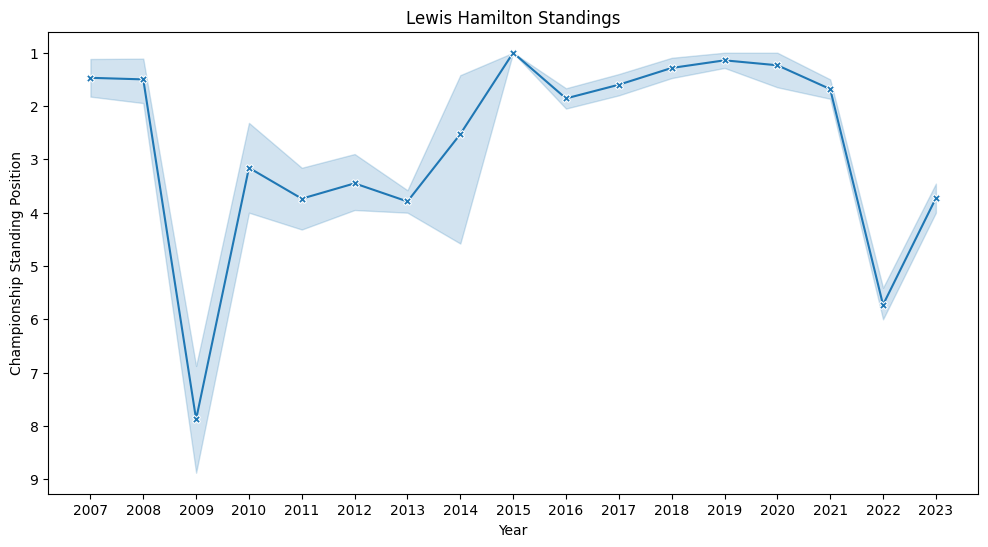

In [ ]:
driver_performance = pd.merge(driver_Standings, drivers, on='driverId')
driver_performance = pd.merge(driver_performance, races, on='raceId')
lewis_hamilton = driver_performance[(driver_performance['code']=='HAM') &
                                    (driver_performance['year']>=2007) &
                                    (driver_performance['year']<=2023)].copy()
lewis_hamilton['year'] = lewis_hamilton['year'].astype(int)
lewis_hamilton.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(12,6))
plt.title('Lewis Hamilton Standings')
sns.lineplot(data=lewis_hamilton, x='year', y='position', marker='X')
plt.gca().invert_yaxis()
plt.xticks(lewis_hamilton['year'].unique())
plt.xlabel('Year')
plt.ylabel('Championship Standing Position')
plt.show()


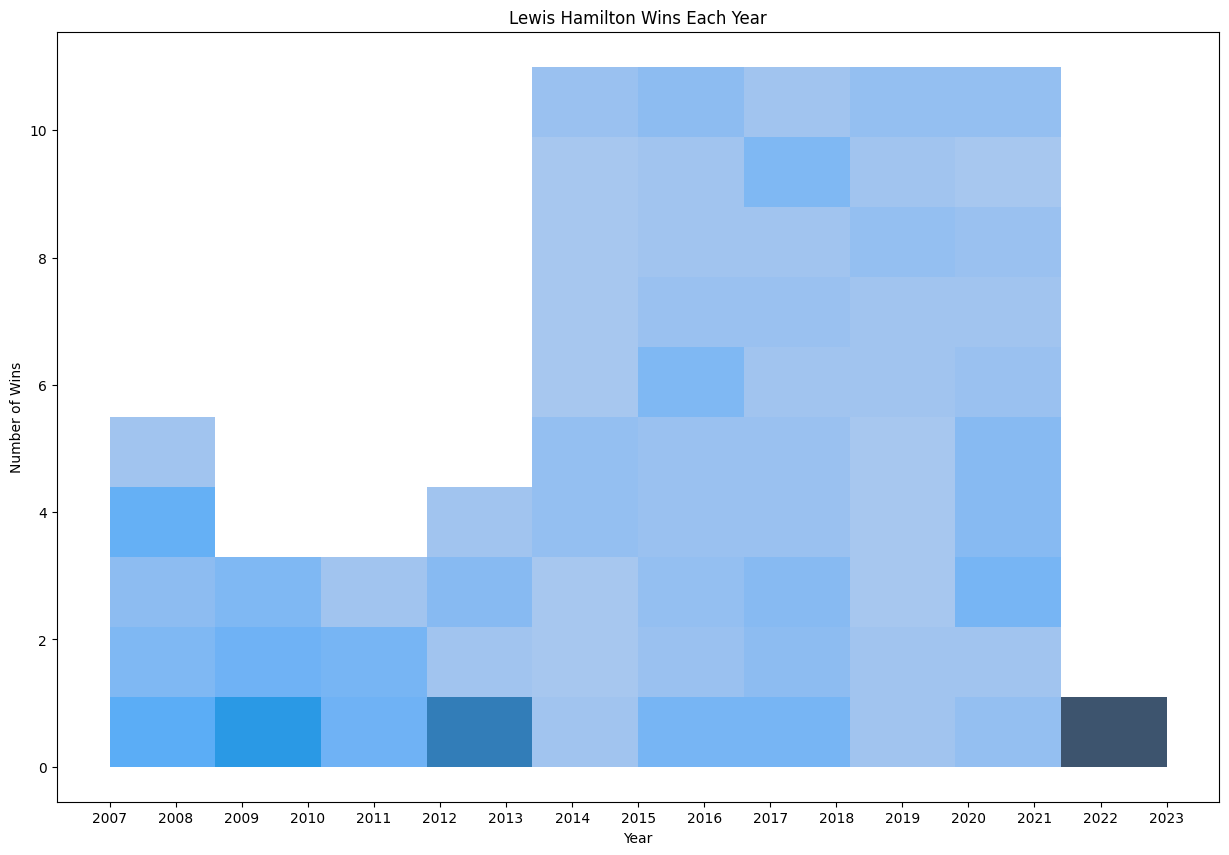

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Lewis Hamilton Wins Each Year')
sns.histplot(data=lewis_hamilton, x='year', y='wins')
plt.xticks(lewis_hamilton['year'].unique())
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.show()

# **Most Wins by a driver in a Season**

In [ ]:
driver_position = drivers.merge(driver_Standings,left_on='driverId',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')
driver_position.year = pd.to_datetime(driver_position['year'], format='%Y')
driver_position.describe()

,driverId,driverStandingsId,raceId,points,position,wins,year,round,circuitId
count,34602.000000,34595.000000,34595.000000,34595.000000,34595.000000,34595.000000,34595,34595.000000,34595.000000
mean,313.417606,42944.384188,580.120104,14.114939,19.778928,0.273074,1985-06-15 07:14:46.081803712,8.461830,25.792918
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950-01-01 00:00:00,1.000000,1.000000
25%,87.000000,19767.500000,352.000000,0.000000,8.000000,0.000000,1968-01-01 00:00:00,5.000000,10.000000
50%,222.000000,49910.000000,600.000000,1.000000,16.000000,0.000000,1985-01-01 00:00:00,8.000000,19.000000
75%,517.000000,59299.500000,803.000000,10.000000,26.000000,0.000000,2004-01-01 00:00:00,12.000000,39.000000
max,860.000000,72871.000000,1132.000000,575.000000,108.000000,19.000000,2024-01-01 00:00:00,22.000000,80.000000
std,272.042104,21859.815278,289.290183,37.235186,16.331054,1.024520,NaN,4.721266,19.596991


In [ ]:
positions = driver_position[driver_position['position'] == 1].groupby(
    ['surname','year'])['wins'].max().sort_values(ascending=False).reset_index(name = 'Wins')
positions.head(20)
positions.year = positions.year.dt.year
positions.rename(columns={'surname':'name'},inplace=True)
positions.Wins = positions.Wins.astype('int64')

positions.head(11)


,name,year,Wins
0,Verstappen,2023,19
1,Verstappen,2022,15
2,Vettel,2013,13
3,Schumacher,2004,13
4,Hamilton,2014,11
5,Schumacher,2002,11
6,Hamilton,2019,11
7,Vettel,2011,11
8,Hamilton,2020,11
9,Hamilton,2018,11


In [ ]:
fig = px.scatter(positions.head(30), x="year", y="Wins", color="name",
                 title="Most wins by a driver in a single season",size = 'Wins')
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(showgrid=False)
fig.show()

# **Mercedes Constructor Championships Analysis**

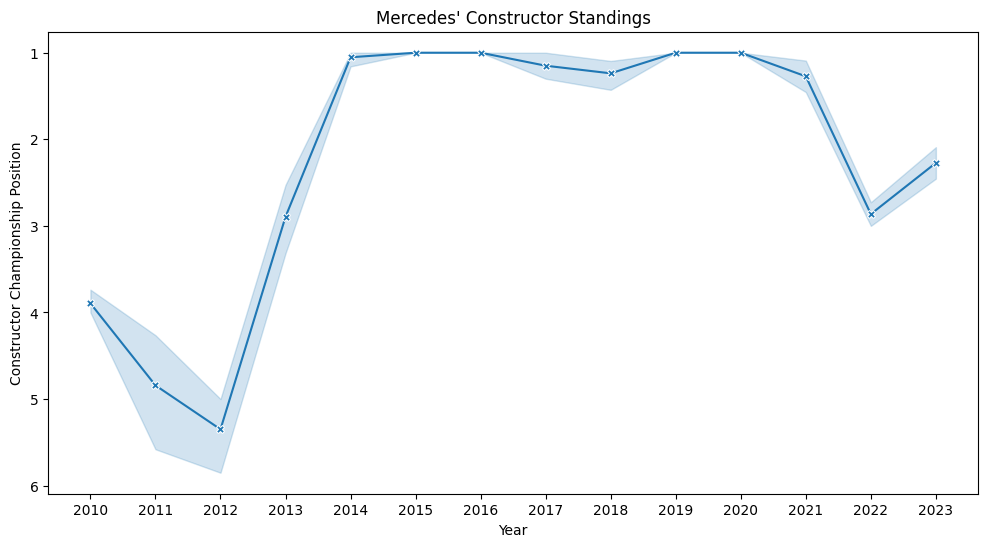

In [ ]:
constructor_performance = pd.merge(constructor_standings, constructors, on='constructorId')
constructor_performance = pd.merge(constructor_performance, races, on='raceId')


mercedes_performance = constructor_performance[(constructor_performance['name_x'] == 'Mercedes') &
                                          (constructor_performance['year'] >= 2008) &
                                          (constructor_performance['year'] <= 2023)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=mercedes_performance, x='year', y='position', marker='X')
plt.title("Mercedes' Constructor Standings")
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.xticks(mercedes_performance['year'].unique())
plt.ylabel('Constructor Championship Position')
plt.show()


# **TOP 5 Constructor winners**

<ipython-input-13-d07bf22f6ab8>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




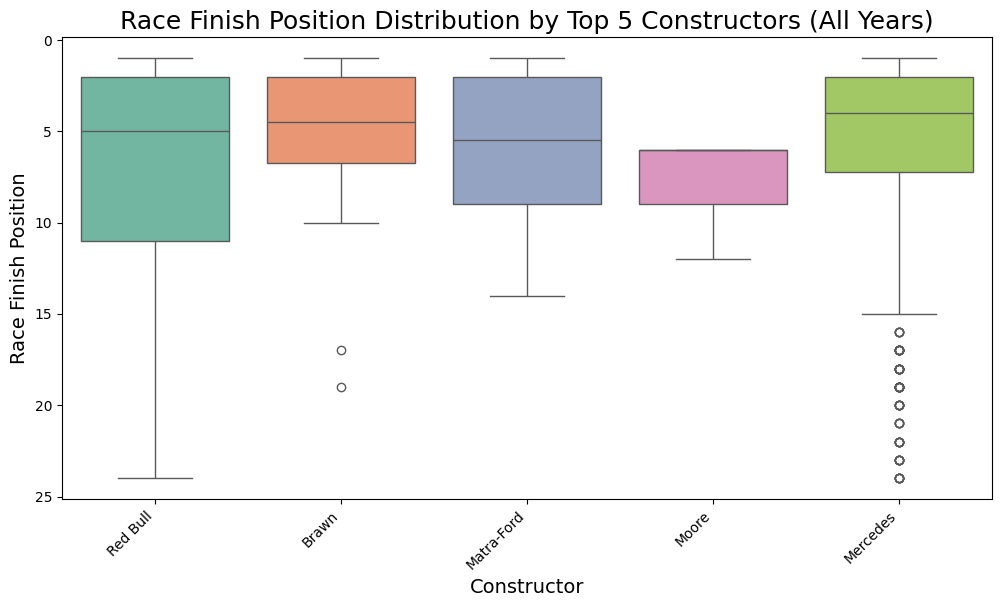

In [ ]:
results_with_names = results.merge(constructors, on='constructorId')


top_constructors = results_with_names.groupby('name')['positionOrder'].mean().nsmallest(6).index

top_constructors = top_constructors[top_constructors != 'BRM-Ford']

results_top = results_with_names[results_with_names['name'].isin(top_constructors)]


plt.figure(figsize=(12, 6))


sns.boxplot(
    x='name',
    y='positionOrder',
    data=results_top,
    palette="Set2"
)
plt.title('Race Finish Position Distribution by Top 5 Constructors (All Years)', fontsize=18)
plt.xlabel('Constructor', fontsize=14)
plt.ylabel('Race Finish Position', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.gca().invert_yaxis()
plt.show()

# **Drivers grouped by Nationalities**

In [ ]:
driver_nationality = drivers.groupby('nationality')['nationality'].count().sort_values(ascending = False).reset_index(name = 'number of drivers')
fig = go.Figure(data=[go.Pie(labels=driver_nationality.nationality.head(10), values=driver_nationality['number of drivers'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#100001', width=2)))
fig.update_layout(
    title="Driver Nationality Distribution since 1950")
fig.show()

# **FORMULA 1 Top 5 in Leaderboard based on Input Year**

In [ ]:
def show_rivalry(x):

    filtered_data = driver_position[driver_position['year'].dt.year == x]


    top_five = filtered_data.groupby('surname')[['points', 'wins']].max().sort_values('points', ascending=False).head(5).reset_index()


    top_five['points'] = top_five['points'].astype('int64')
    top_five['wins'] = top_five['wins'].astype('int64')

    fig = px.bar(top_five, x='surname', y='points',
                 hover_data=['wins'], color='points',
                 height=400, color_continuous_scale='turbo')

    fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout(
        title=f"Top 5 Drivers by Points in {x}",
        title_x=0.5,
        title_font=dict(size=24)
    )
    fig.show()


show_rivalry(2021)


# **Pole Position to Winning the Race**

Probability of winning from pole position at British: 44.00%
Probability of winning from pole position at Monaco: 54.17%
Probability of winning from pole position at Abu Dhabi: 66.67%


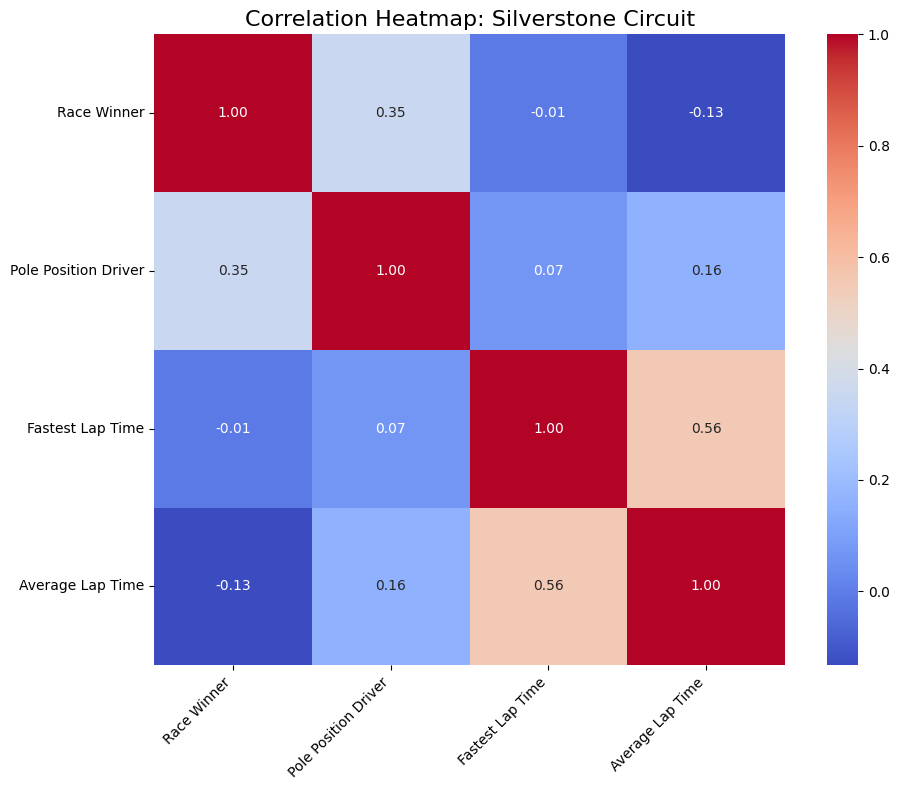

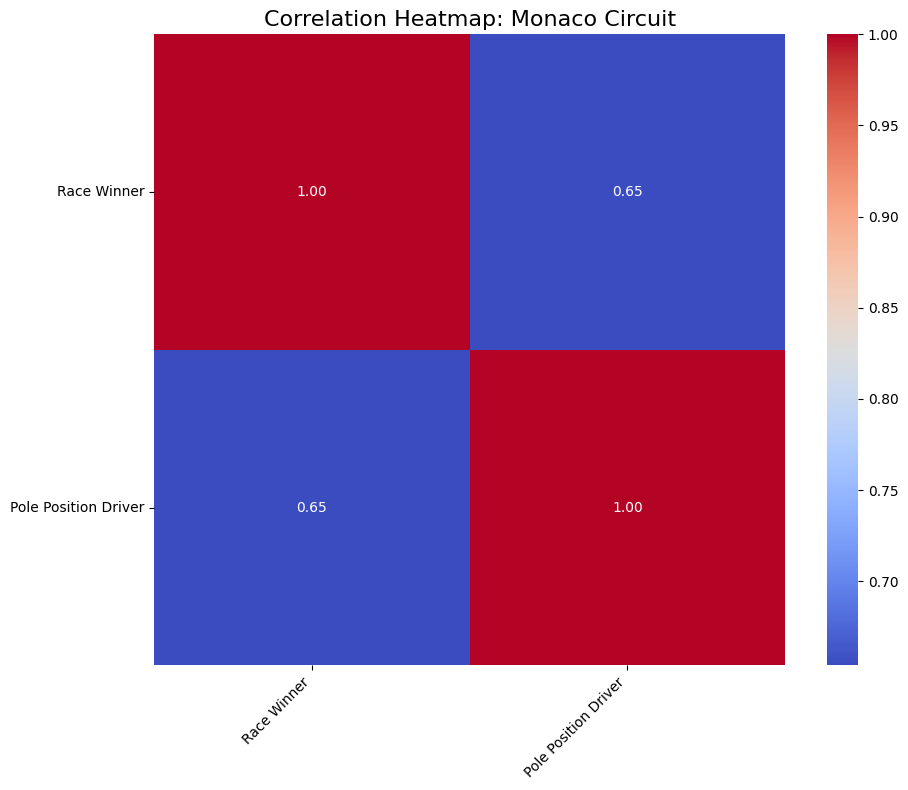

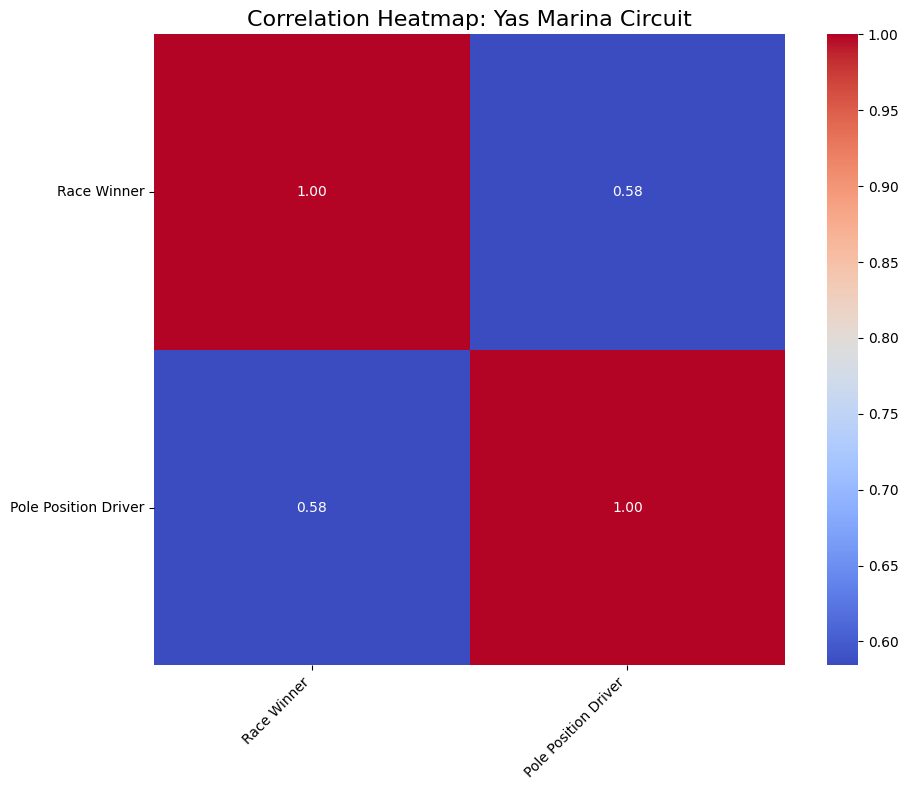

In [ ]:

def calculate_pole_to_win_probability(circuit_name, races, qualifying, results, lap_times, drivers, include_extra_features=False):
    circuit = races[races['name'].str.contains(circuit_name, case=False, na=False)]['circuitId'].unique()

    if len(circuit) == 0:
        raise ValueError(f"No {circuit_name} circuit found in the dataset.")

    circuit_races = races[races['circuitId'].isin(circuit)]

    if circuit_races.shape[0] == 0:
        raise ValueError(f"No races found for the {circuit_name} circuit.")

    qualifying_circuit = qualifying.merge(circuit_races[['raceId']], on='raceId')
    results_circuit = results.merge(circuit_races[['raceId']], on='raceId')
    lap_times_circuit = lap_times.merge(circuit_races[['raceId']], on='raceId')

    if qualifying_circuit.shape[0] == 0 or results_circuit.shape[0] == 0:
        raise ValueError(f"No qualifying or results data available for the {circuit_name} races.")

    pole_positions_circuit = qualifying_circuit[qualifying_circuit['position'] == 1][['raceId', 'driverId', 'q3']].rename(columns={'driverId': 'pole_position_driver', 'q3': 'fastest_qualifying_time'})
    race_winners_circuit = results_circuit[results_circuit['positionOrder'] == 1][['raceId', 'driverId']].rename(columns={'driverId': 'race_winner_driver'})
    race_summary_circuit = circuit_races[['raceId', 'name']].merge(pole_positions_circuit, on='raceId').merge(race_winners_circuit, on='raceId')

    if include_extra_features:

        fastest_lap = lap_times_circuit.groupby('raceId')['milliseconds'].min().reset_index().rename(columns={'milliseconds': 'fastest_lap_time'})
        avg_lap_time = lap_times_circuit.groupby('raceId')['milliseconds'].mean().reset_index().rename(columns={'milliseconds': 'average_lap_time'})

        race_summary_circuit = race_summary_circuit.merge(fastest_lap, on='raceId').merge(avg_lap_time, on='raceId')

    if race_summary_circuit.shape[0] == 0:
        raise ValueError(f"No race summary data available for {circuit_name}.")

    pole_to_win = race_summary_circuit[race_summary_circuit['pole_position_driver'] == race_summary_circuit['race_winner_driver']].shape[0]
    total_races = race_summary_circuit.shape[0]

    if total_races == 0:
        raise ZeroDivisionError("Total number of races is zero, cannot calculate probability.")

    pole_to_win_probability = pole_to_win / total_races

    driver_id_to_name = dict(zip(drivers['driverId'], drivers['surname']))
    race_summary_circuit['pole_position_driver'] = race_summary_circuit['pole_position_driver'].map(driver_id_to_name)
    race_summary_circuit['race_winner_driver'] = race_summary_circuit['race_winner_driver'].map(driver_id_to_name)

    race_summary_circuit = race_summary_circuit[['name', 'race_winner_driver', 'pole_position_driver', 'fastest_qualifying_time'] + (['fastest_lap_time', 'average_lap_time'] if include_extra_features else [])]
    race_summary_circuit.columns = ['Grand Prix', 'Race Winner', 'Pole Position Driver', 'Fastest Qualifying Lap Time'] + (['Fastest Lap Time', 'Average Lap Time'] if include_extra_features else [])

    print(f"Probability of winning from pole position at {circuit_name}: {pole_to_win_probability:.2%}")

    return race_summary_circuit

def plot_correlation_heatmap(race_summary, title):

    race_summary_numeric = race_summary.copy()
    race_summary_numeric['Pole Position Driver'] = race_summary_numeric['Pole Position Driver'].astype('category').cat.codes
    race_summary_numeric['Race Winner'] = race_summary_numeric['Race Winner'].astype('category').cat.codes


    numeric_columns = race_summary_numeric.select_dtypes(include=['number'])

    corr_matrix = numeric_columns.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f')
    plt.title(f'Correlation Heatmap: {title}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

race_summary_silverstone = calculate_pole_to_win_probability('British', races, qualifying, results, lap_times, drivers,True)
race_summary_monaco = calculate_pole_to_win_probability('Monaco', races, qualifying, results, lap_times, drivers)
race_summary_abudhabi = calculate_pole_to_win_probability('Abu Dhabi', races, qualifying, results, lap_times, drivers)

plot_correlation_heatmap(race_summary_silverstone, 'Silverstone Circuit')
plot_correlation_heatmap(race_summary_monaco, 'Monaco Circuit')
plot_correlation_heatmap(race_summary_abudhabi, 'Yas Marina Circuit')

# **Race Simulation using different pit stops strategy**

In [ ]:
def simulate_race(strategy, n_simulations=100000):
    results = []
    for _ in range(n_simulations):

        outcome = strategy['pit_stops'] * np.random.normal(1, 0.1) + strategy['qualifying_position']
        results.append(outcome)
    return np.mean(results), np.std(results)


strategy_1 = {'pit_stops': 1, 'qualifying_position': 5}
strategy_2 = {'pit_stops': 2, 'qualifying_position': 5}


mean_outcome_1, std_outcome_1 = simulate_race(strategy_1)
mean_outcome_2, std_outcome_2 = simulate_race(strategy_2)

print(f'Strategy 1 (1 pit stop): Mean outcome {mean_outcome_1}, Std Dev: {std_outcome_1}')
print(f'Strategy 2 (2 pit stops): Mean outcome {mean_outcome_2}, Std Dev: {std_outcome_2}')

Strategy 1 (1 pit stop): Mean outcome 5.999875419117504, Std Dev: 0.09960606888769892
Strategy 2 (2 pit stops): Mean outcome 7.000342719082844, Std Dev: 0.19957067214672516


# **Actual Vs Predicted Race Positions**

Best Alpha: 100.0
Mean Squared Error: 29.33
R-squared: 0.01


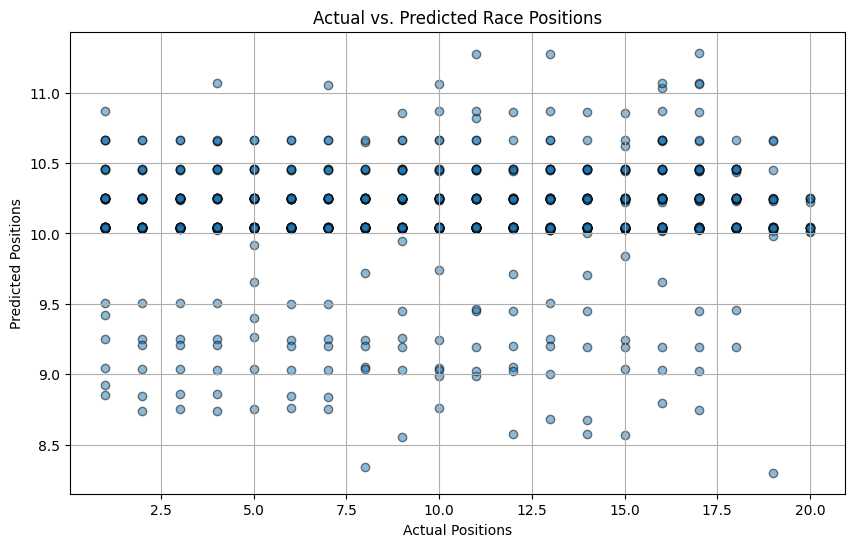

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt


pit_stops_2023 = pit_stops[pit_stops['raceId'].isin(races[races['year'] == 2023]['raceId'])]
results_2023 = results[results['raceId'].isin(races[races['year'] == 2023]['raceId'])]


pit_stop_impact_2023 = pd.merge(pit_stops_2023, results_2023, on=['raceId', 'driverId'])


X = pit_stop_impact_2023[['stop', 'milliseconds_x']]
y = pit_stop_impact_2023['positionOrder']


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])


param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)


best_model = grid_search.best_estimator_


predicted_positions = best_model.predict(X)


mse = mean_squared_error(y, predicted_positions)
r2 = r2_score(y, predicted_positions)

print(f'Best Alpha: {grid_search.best_params_["ridge__alpha"]}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_positions, alpha=0.5, edgecolors='k')
plt.xlabel('Actual Positions')
plt.ylabel('Predicted Positions')
plt.title('Actual vs. Predicted Race Positions')
plt.grid(True)
plt.show()


# **GP Winner Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def predict_gp_winner(grand_prix_name, year, races, qualifying, results, drivers):

    recent_years = list(range(year-4, year+1))
    gp_recent = races[(races['name'].str.contains(grand_prix_name)) & (races['year'].isin(recent_years))]

    if gp_recent.empty:
        print(f"No recent data found for {grand_prix_name}.")
        return


    qualifying_gp_recent = qualifying[qualifying['raceId'].isin(gp_recent['raceId'])]


    results_gp_recent = results[results['raceId'].isin(gp_recent['raceId'])]


    avg_qualifying_position = qualifying_gp_recent.groupby('driverId')['position'].mean().reset_index().rename(columns={'position': 'avg_qualifying_position'})
    avg_race_position = results_gp_recent.groupby('driverId')['positionOrder'].mean().reset_index().rename(columns={'positionOrder': 'avg_race_position'})


    features = avg_qualifying_position.merge(avg_race_position, on='driverId')


    results_gp_recent['winner'] = results_gp_recent['positionOrder'] == 1
    race_winners_recent = results_gp_recent[['raceId', 'driverId', 'winner']]
    race_winners_recent = race_winners_recent[race_winners_recent['winner']].drop(columns=['winner'])


    data_recent = features.merge(race_winners_recent, on='driverId', how='left').fillna(0)


    X = data_recent[['avg_qualifying_position', 'avg_race_position']]
    y = data_recent['driverId'].apply(lambda x: 1 if x in race_winners_recent['driverId'].values else 0)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


    races_year = races[races['year'] == year]
    results_year = results[results['raceId'].isin(races_year['raceId'])]


    drivers_year_ids = results_year['driverId'].unique()


    latest_qualifying_position = qualifying[qualifying['driverId'].isin(drivers_year_ids) & qualifying['raceId'].isin(races_year['raceId'])].groupby('driverId')['position'].mean().reset_index().rename(columns={'position': 'avg_qualifying_position'})
    latest_race_position = results[results['driverId'].isin(drivers_year_ids) & results['raceId'].isin(races_year['raceId'])].groupby('driverId')['positionOrder'].mean().reset_index().rename(columns={'positionOrder': 'avg_race_position'})


    latest_features = latest_qualifying_position.merge(latest_race_position, on='driverId')


    probabilities = model.predict_proba(latest_features[['avg_qualifying_position', 'avg_race_position']])[:, 1]


    driver_id_to_name = dict(zip(drivers['driverId'], drivers['surname']))
    latest_features['driver'] = latest_features['driverId'].map(driver_id_to_name)

    latest_features['probability'] = probabilities


    best_driver = latest_features.loc[latest_features['probability'].idxmax()]

    print(latest_features[['driver', 'avg_qualifying_position', 'avg_race_position', 'probability']])

    print(f"The predicted winner for the {year} {grand_prix_name}: {best_driver['driver']} with probability {best_driver['probability']:.2f}")
predict_gp_winner('Bahrain', 2024, races, qualifying, results, drivers)

<ipython-input-33-2f66316fb564>:106: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

        driver  avg_qualifying_position  avg_race_position  probability
0     Hamilton                 7.750000           6.916667         0.21
1       Alonso                10.000000           9.833333         0.00
2   Hülkenberg                11.666667          10.916667         0.00
3        Pérez                 8.250000           7.833333         0.21
4    Ricciardo                13.166667          13.583333         0.00
5       Bottas                15.166667          15.916667         0.00
6    Magnussen                15.666667          13.583333         0.00
7   Verstappen                 1.833333           3.416667 